# 6.2 Exploring relationships

### 0.1 Importing 

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# checking to make sure matplot is the right version
matplotlib.__version__

'3.3.4'

In [3]:
# ensuring the chart displayes in the notebook instead of having to call them specifically. 
%matplotlib inline

In [4]:
# imporing data
path = r"C:\Users\quinn\PycharmProjects\Netflix Analysis 07-23-2021"
df = pd.read_csv(os.path.join(path,'02 Data','Original Data','netflix_titles_enriched.csv'), index_col = False)

### 0.2 Checking the data and fixing the data

In [5]:
df.head()

,Unnamed: 0,cast,type,title,country,date_added,release_year,description,director,duration,listed_in,rating,rottentomatoes_info,rottentomatoes_cast,rottentomatoes_audience_score,rottentomatoes_audience_#reviews,rottentomatoes_audience_review,rottentomatoes_tomatometer_score,rottentomatoes_critics_#reviews,rottentomatoes_critic_review
0,s2,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Movie,7:19,Mexico,23-Dec-16,2016,After a devastating earthquake hits Mexico Cit...,Jorge Michel Grau,93 min,"Dramas, International Movies",TV-MA,"{'Genre': 'drama', 'Original Language': 'Spani...","{'Elsa - Eloisa Delfin': 'Carmen Beato', 'Fern...",52.0,10,NaN,100.0,10.0,[{'Review': 'The intentions of this film are c...
1,s3,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Movie,23:59,Singapore,20-Dec-18,2011,"When an army recruit is found dead, his fellow...",Gilbert Chan,78 min,"Horror Movies, International Movies",R,"{'Genre': 'horror', 'Original Language': 'Chin...","{'Boss': 'Philip Hersh', 'Tan': 'Tedd Chan', '...",20.0,10,NaN,NaN,0.0,NaN
2,s4,"Elijah Wood, John C. Reilly, Jennifer Connelly...",Movie,9,United States,16-Nov-17,2009,"In a postapocalyptic world, rag-doll robots hi...",Shane Acker,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",PG-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s5,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",Movie,21,United States,1-Jan-20,2008,A brilliant group of students become card-coun...,Robert Luketic,123 min,Dramas,PG-13,"{'Genre': 'romance, comedy, drama', 'Original ...","{'Justin Sellers': 'Matt Wheeler', 'Sam Presco...",17.0,10,NaN,NaN,0.0,"[{'Review': 'Empty calories, yes, but tasty en..."
4,s7,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Movie,122,Egypt,1-Jun-20,2019,"After an awful accident, a couple admitted to ...",Yasir Al Yasiri,95 min,"Horror Movies, International Movies",TV-MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,release_year,rottentomatoes_audience_score,rottentomatoes_tomatometer_score,rottentomatoes_critics_#reviews
count,9657.000000,5103.000000,4234.000000,5614.000000
mean,2014.164130,57.731139,50.476382,26.141254
std,8.592718,31.827412,39.789661,53.134087
min,1925.000000,0.000000,0.000000,0.000000
25%,2014.000000,37.000000,0.000000,0.000000
50%,2017.000000,67.000000,60.000000,5.000000
75%,2019.000000,84.000000,89.000000,23.000000
max,2021.000000,100.000000,100.000000,477.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9657 entries, 0 to 9656
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        9657 non-null   object 
 1   cast                              8852 non-null   object 
 2   type                              9657 non-null   object 
 3   title                             9657 non-null   object 
 4   country                           9080 non-null   object 
 5   date_added                        9603 non-null   object 
 6   release_year                      9657 non-null   int64  
 7   description                       9657 non-null   object 
 8   director                          5537 non-null   object 
 9   duration                          9657 non-null   object 
 10  listed_in                         9657 non-null   object 
 11  rating                            9657 non-null   object 
 12  rotten

In [8]:
df.isnull().sum()

Unnamed: 0                             0
cast                                 805
type                                   0
title                                  0
country                              577
date_added                            54
release_year                           0
description                            0
director                            4120
duration                               0
listed_in                              0
rating                                 0
rottentomatoes_info                 4084
rottentomatoes_cast                 4501
rottentomatoes_audience_score       4554
rottentomatoes_audience_#reviews    4030
rottentomatoes_audience_review      7945
rottentomatoes_tomatometer_score    5423
rottentomatoes_critics_#reviews     4043
rottentomatoes_critic_review        5206
dtype: int64

In [9]:
# getting rid of a colum rottentomatoes_audience_review since it is missing so much data and makeing a new dataframe
df_1=df.drop(['rottentomatoes_audience_review'],axis=1)

In [10]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9657 entries, 0 to 9656
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        9657 non-null   object 
 1   cast                              8852 non-null   object 
 2   type                              9657 non-null   object 
 3   title                             9657 non-null   object 
 4   country                           9080 non-null   object 
 5   date_added                        9603 non-null   object 
 6   release_year                      9657 non-null   int64  
 7   description                       9657 non-null   object 
 8   director                          5537 non-null   object 
 9   duration                          9657 non-null   object 
 10  listed_in                         9657 non-null   object 
 11  rating                            9657 non-null   object 
 12  rotten

In [11]:
df_1.shape

(9657, 19)

In [12]:
# renameing some column names
df_1.rename(columns={'rottentomatoes_info':'rt_info','rottentomatoes_cast':'rt_cast','rottentomatoes_audience_score':'rt_audience_score','rottentomatoes_audience_#reviews':'rt_audience_#reviews','rottentomatoes_tomatometer_score':'rt_tomatometer_score','rottentomatoes_critics_#reviews':'rt_critics_#reviews','rottentomatoes_critic_review':'rt_critic_review'}, inplace=True)

In [13]:
# checking to make sure it worked
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9657 entries, 0 to 9656
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            9657 non-null   object 
 1   cast                  8852 non-null   object 
 2   type                  9657 non-null   object 
 3   title                 9657 non-null   object 
 4   country               9080 non-null   object 
 5   date_added            9603 non-null   object 
 6   release_year          9657 non-null   int64  
 7   description           9657 non-null   object 
 8   director              5537 non-null   object 
 9   duration              9657 non-null   object 
 10  listed_in             9657 non-null   object 
 11  rating                9657 non-null   object 
 12  rt_info               5573 non-null   object 
 13  rt_cast               5156 non-null   object 
 14  rt_audience_score     5103 non-null   float64
 15  rt_audience_#reviews 

In [14]:
#Checking for duplicates
df_dups = df_1[df_1.duplicated()]

In [15]:
# no duplicates
df_dups.shape

(0, 19)

In [16]:
df_1.isnull().sum()

Unnamed: 0                 0
cast                     805
type                       0
title                      0
country                  577
date_added                54
release_year               0
description                0
director                4120
duration                   0
listed_in                  0
rating                     0
rt_info                 4084
rt_cast                 4501
rt_audience_score       4554
rt_audience_#reviews    4030
rt_tomatometer_score    5423
rt_critics_#reviews     4043
rt_critic_review        5206
dtype: int64

### 0.3 Creating visulizations 

##### .3a Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.

In [17]:
# creating a sub set for my exploratory visual analysis
sub= df_1[['release_year', 'rt_audience_score', 'rt_tomatometer_score', 'rt_critics_#reviews']]

In [18]:
# looking at the shape
sub.shape

(9657, 4)

In [19]:
# creating for isin function to work
us=['United States']
ja=['Japan']
au=['Australia']
ind=['India']

In [20]:
# creating new data frames with only United States, Japan, Australia, and India to diversify the groups a bit
df_us =df_1[df_1['country'].isin(us)]

In [21]:
df_ja =df_1[df_1['country'].isin(ja)]

In [22]:
df_au =df_1[df_1['country'].isin(au)]

In [23]:
df_ind =df_1[df_1['country'].isin(ind)]

In [24]:
# Fixing the insull for the new data frames
df_us['rt_audience_score'].fillna(df_us['rt_audience_score'].median(), inplace=True)
df_us['rt_tomatometer_score'].fillna(df_us['rt_tomatometer_score'].median(), inplace=True)
df_ja['rt_audience_score'].fillna(df_ja['rt_audience_score'].median(), inplace=True)
df_ja['rt_tomatometer_score'].fillna(df_ja['rt_tomatometer_score'].median(), inplace=True)
df_au['rt_audience_score'].fillna(df_au['rt_audience_score'].median(), inplace=True)
df_au['rt_tomatometer_score'].fillna(df_au['rt_tomatometer_score'].median(), inplace=True)
df_ind['rt_audience_score'].fillna(df_ind['rt_audience_score'].median(), inplace=True)
df_ind['rt_tomatometer_score'].fillna(df_ind['rt_tomatometer_score'].median(), inplace=True)

D:\SQL\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


##### .3b Create a correlation matrix heatmap (colored)

In [29]:
# lookiong at the matrix
sub.corr()

,release_year,rt_audience_score,rt_tomatometer_score,rt_critics_#reviews
release_year,1.000000,-0.082891,-0.076643,-0.140568
rt_audience_score,-0.082891,1.000000,0.521416,0.171639
rt_tomatometer_score,-0.076643,0.521416,1.000000,0.285364
rt_critics_#reviews,-0.140568,0.171639,0.285364,1.000000


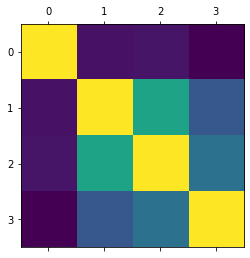

In [30]:
# creating a correlation heatmap using matplotlib
plt.matshow(sub.corr())

Text(0.5, 1.0, 'Correlation Matrix')

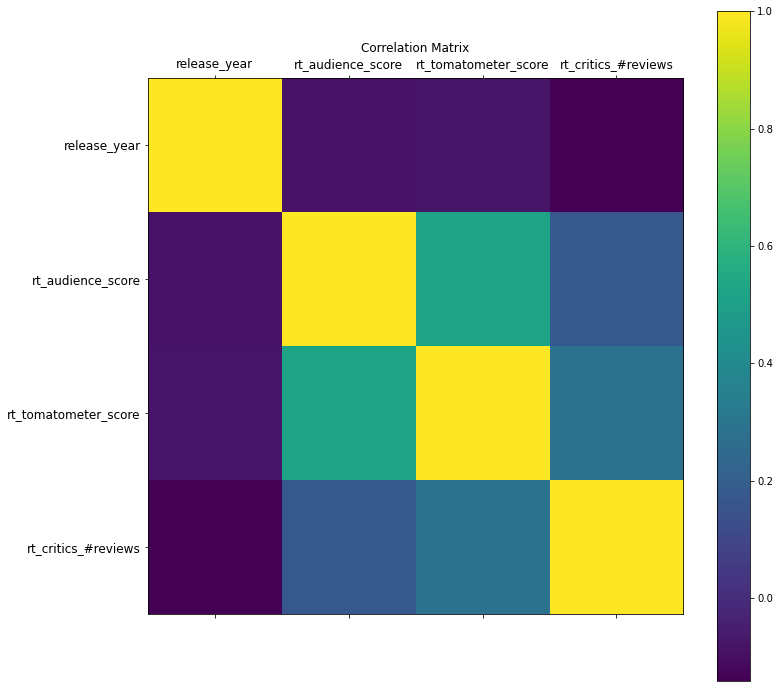

In [31]:
# makeing it more readable 
f = plt.figure(figsize=(12, 12)) 
plt.matshow(sub.corr(), fignum=f.number)
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=12, rotation=0)
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=12)
cb = plt.colorbar()
plt.title('Correlation Matrix', fontsize=12)

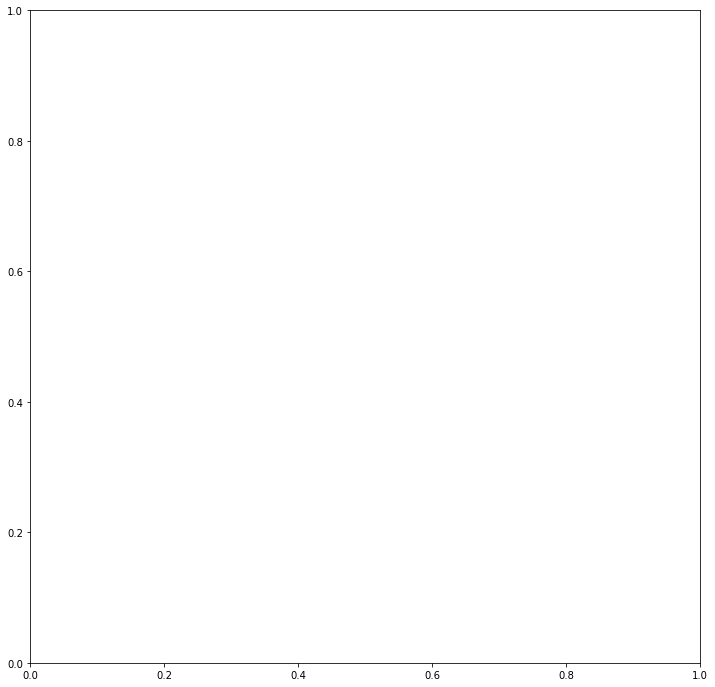

In [32]:
 # creating a heatmap to place the seaborn map onto
f,ax = plt.subplots(figsize=(12,12))

In [28]:
# creating a correlation heat map using seaborn
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)  

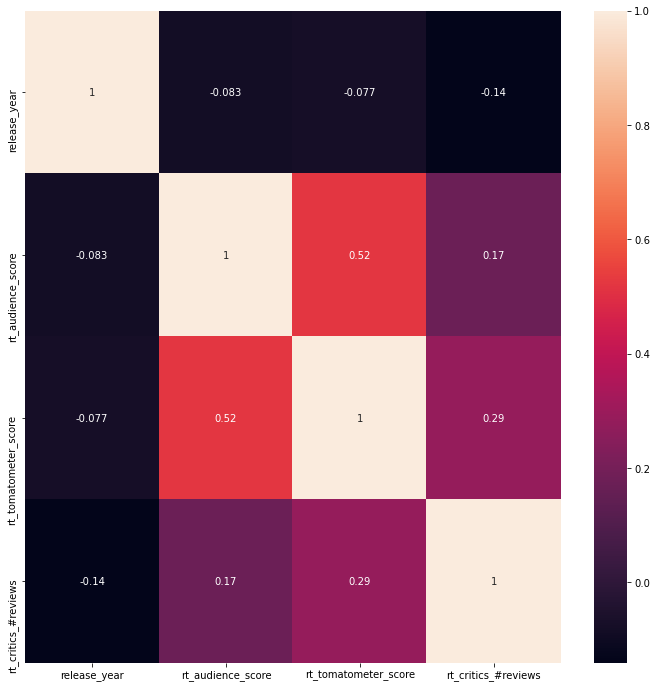

In [29]:
corr.figure

 There really is no storng correlation between the data points. The closest columns that have any correlation are the audience score and the roten tomato score.

##### .3c Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

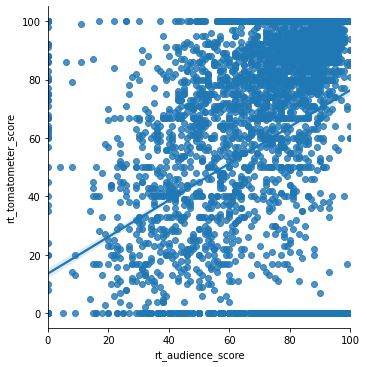

In [30]:
# Create a scatterplot for the "audience score" and "tomatometer score" columns in seaborn

sns.lmplot(x= 'rt_audience_score',y='rt_tomatometer_score', data= sub)

There are a lot of outliers but it does look like the audience scores around the tomatometer score.

##### .3d Create a pair plot of the entire data set.

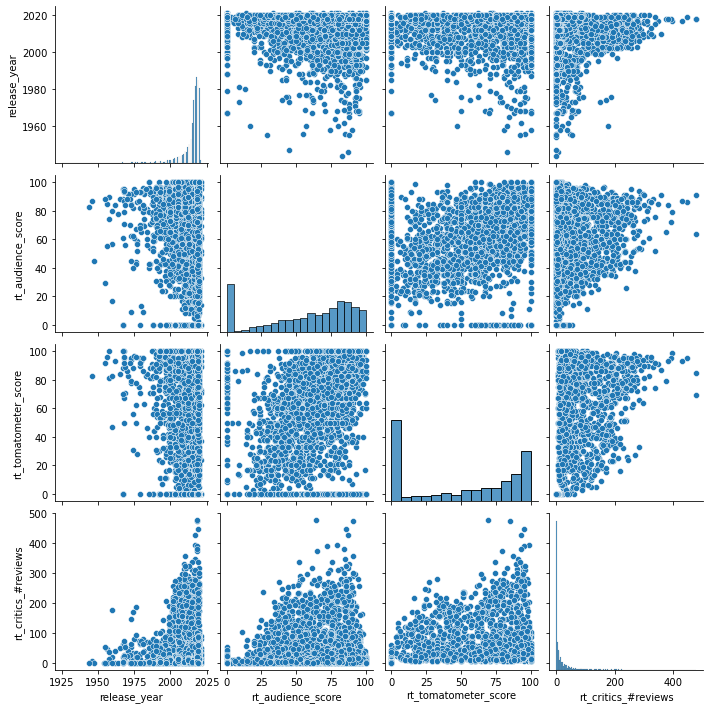

In [31]:
# Since I dont have many columns to go off of i will use the normal sub for the pair plot
plot = sns.pairplot(sub)

The distribution for all the data point folow along with the rotten tomatoe score but besides that all the points seem to have some or little correlation. I want to look more at audience scores and rotten tomatoe score. 

##### .3e Create a categorical plot and interpret the results.

D:\SQL\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rt_audience_score', ylabel='Density'>

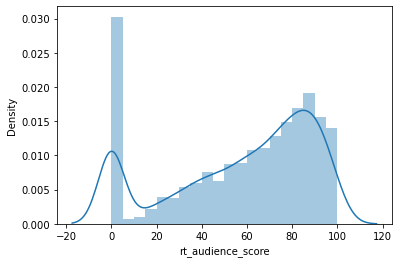

In [47]:
# createing a categorical plot for all the movies
sns.distplot(df_1['rt_audience_score'], bins = 20)

D:\SQL\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rt_audience_score', ylabel='Density'>

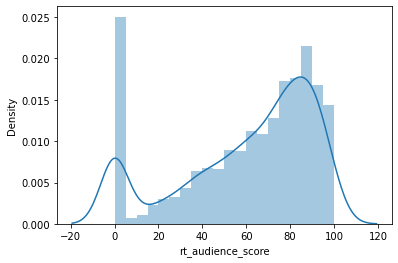

In [37]:
# createing a categorical plot for united states
sns.distplot(df_us['rt_audience_score'], bins = 20)

D:\SQL\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rt_audience_score', ylabel='Density'>

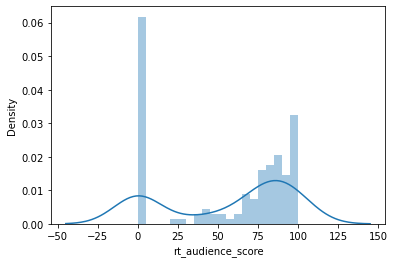

In [38]:
# createing a categorical plot for japan
sns.distplot(df_ja['rt_audience_score'], bins = 20)

D:\SQL\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rt_audience_score', ylabel='Density'>

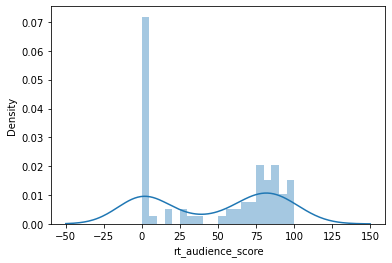

In [39]:
# createing a categorical plot for australia
sns.distplot(df_au['rt_audience_score'], bins = 20)

D:\SQL\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rt_audience_score', ylabel='Density'>

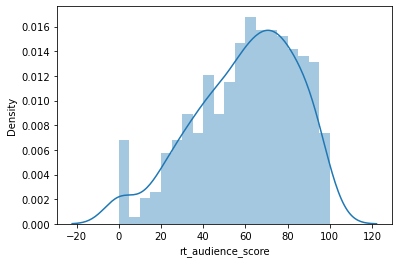

In [40]:
# createing a categorical plot for india
sns.distplot(df_ind['rt_audience_score'], bins = 20)

##### .3f Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

Just by looking at the graphs all together there relly is no correlations. The graph show's that over all movies on netflix are more around 80%-100%. Which we can say people generally give a movie or tv show more then 50%.

##### .3g Define any hypotheses that you can at this point. You’ll be testing these later on.

### hypotheses
#The higher the rotten tomato score the higher people will rate the movie \tv show

### 0.4 Saving the data frames

In [33]:
# Saving the revised data frame
df_1.to_csv(os.path.join(path, '02 Data','Prepared Data', 'netflix_checked.csv'))

In [34]:
# saving the data frames for the seperate countrys
df_us.to_csv(os.path.join(path, '02 Data','Prepared Data', 'netflix_united_states.csv'))

In [35]:
df_ja.to_csv(os.path.join(path, '02 Data','Prepared Data', 'netflix_japan.csv'))

In [36]:
df_au.to_csv(os.path.join(path, '02 Data','Prepared Data', 'netflix_australia.csv'))

In [37]:
df_ind.to_csv(os.path.join(path, '02 Data','Prepared Data', 'netflix_india.csv'))